# Chapter 2. 퍼셉트론

## 2.1 퍼셉트론이란?

**퍼셉트론**은 다수의 신호를 입력으로 받아 하나의 신호(흐름)를 출력한다. (이때, 신호는 '흐른다(1)/안 흐른다(0)의 상태)

아래 그림은 입력으로 2개의 신호를 받은 퍼셉트론의 예이다.
- 입력 신호: $x_1$, $x_2$
- 출력 신호: $y$
- 가중치: $w_1$, $w_2$

그림의 원을 **뉴런** 혹은 **노드**라 부르며, 입력 신호가 뉴런에 보내질 때는 각각 고유한 **가중치**가 곱해진다.($w_1$$x_1$, $w_2$$x_2$)

뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력하는데, 이를 '뉴런이 활성화한다'라 표현하기도 한다. 이때 이 한계를 임계값($\theta$)이라 한다.

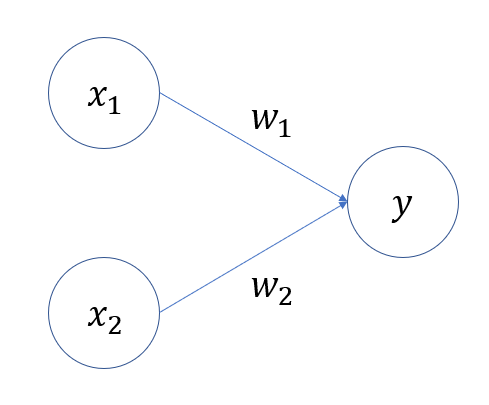

퍼셉트론의 동작 원리를 수식으로 나타내면 다음과 같다.

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다. 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다. 즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.

$$
y =
\begin{cases}
0 \left( w_1 x_1 + w_2 x_2 \leq \theta \right) \\
1 \left( w_1 x_1 + w_2 x_2 > \theta \right)
\end{cases}
$$


## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트
- ADN 게이트는 입력이 둘이고 출력은 하나
- 아래와 같은 입력 신호와 출력 신호 대응 표를 **진리표**라 함
- 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력

| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 0 |
|  1 |  0 | 0 |
|  0 |  1 | 0 |
|  1 |  1 | 1 |


AND 게이트를 퍼셉트론으로 표현하려면 진리표대로 작동하는 $w_1$, $w_2$, $\theta$  값을 정해야 함

=> 그렇다면 어떤 값으로 설정하면 진리표의 조건을 충족하는 퍼셉트론이 만들어질까?

ex.
($w_1$, $w_2$, $\theta$) = (0.5, 0.5, 0.7) or (0.5, 0.5, 0.8) or (1.0, 1.0, 1.0) 와 같은 양의 값

위와 같이 설정하면 $x_1$, $x_2$가 모두 1일 때만 가중 신호의 총합이 주어진 임계값을 넘게 됨

### 2.2.2 NAND 게이트와 OR 게이트
- NAND 게이트는 AND 게이트의 출력을 뒤집은 Not AND를 의미함
- 두 입력이 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력
- ex. (-0.5, -0.5, -0.7)과 같은 음의 값 (AND 게이트를 구현하는 매개변수의 부호를 모두 반전)

| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 1 |
|  1 |  0 | 1 |
|  0 |  1 | 1 |
|  1 |  1 | 0 |

- OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로

| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 0 |
|  1 |  0 | 1 |
|  0 |  1 | 1 |
|  1 |  1 | 1 |

정리하자면, 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다는 것이다. 3가지 게이트에서 다른 것은 매개변수 (가중치와 임계값)의 값뿐이기에 이의 값만 적절히 조정하면 다른 게이트로 변신할 수 있다.

학습: 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 함

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [1]:
# AND 게이트
# 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고 그 외에는 0을 반환한다.

def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [2]:
AND(0, 0) # 0을 출력
AND(1, 0) # 0을 출력
AND(0, 1) # 0을 출력
AND(1, 1) # 1을 출력

1

### 2.3.2 가중치와 편향 도입
$\theta$를 $-b$로 치환하면 다음처럼 퍼셉트론 동작이 변경됨


$$
y =
\begin{cases}
0 \left( b + w_1 x_1 + w_2 x_2 \leq 0 \right) \\
1 \left( b + w_1 x_1 + w_2 x_2 > 0 \right)
\end{cases}
$$


- $b$는 편향(bias)
- $w_1$, $w_2$는 가중치(weight)

위의 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

In [4]:
# 넘파이를 사용하여 위의 퍼셉트론 방식으로 구현

import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향

# 인덱스가 같은 원소끼리 곱함 ([0, 1] * [0.5, 0.5] => [0, 0.5])
w*x

array([0. , 0.5])

In [5]:
# 입력한 배열에 담긴 모든 원소의 총합을 계산
np.sum(w*x)

0.5

In [6]:
np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 가중치와 편향 구하기
- 아래는 $-\theta$를 $b$로 치환됨

정리하자면,
- $w_1$, $w_2$: 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- 편향($b$): 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수

예를 들어, $b$가 -0.1이면 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화됨. 반면, $b$가 -20.0이면 각 입력 신호에 가중치를 곱한 값들의 합이 20.0을 넘지 않으면 뉴런은 활성화되지 않음.

($w_1$, $w_2$, $b$는 서로 가중치, 편향으로 구별하기도 하지만, 문맥에 따라 셋 모두를 '가중치'라고 할 때도 있음)

In [7]:
# 가중치와 편향을 도입한 AND 게이트

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [8]:
# NAND 게이트

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # AND와는 가중치(w와 b)만 다르다.
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [9]:
# OR 게이트

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5]) # AND와는 가중치(w와 b)만 다르다.
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트
- XOR 게이트는 **배타적 논리합**이라는 논리 회로
- $x_1$, $x_2$ 중 한쪽이 1일 때만 1을 출력

| x1 | x2 | y |
|----|----|---|
|  0 |  0 | 0 |
|  1 |  0 | 1 |
|  0 |  1 | 1 |
|  1 |  1 | 0 |

위 XOR 게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정하면 될까?

=> 답변은, 지금까지 본 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.

OR 게이트는 예를 들어, 가중치 매개변수가 (-0.5, 1.0, 1.0)일 때 위 진리표를 만족하는데, 이때의 퍼셉트론은 아래와 같이 표현된다.

$$
y =
\begin{cases}
0 \left( -0.5 + x_1 + x_2 \leq 0 \right) \\
1 \left( -0.5 + x_1 + x_2 > 0 \right)
\end{cases}
$$


위의 퍼셉트론은 직선으로 나뉜 두 영역을 만든다. 직선으로 나뉜 한쪽 영역은 1을 출력하고 다른 한쪽은 0을 출력한다.

회색 영역은 0을 출력하는 영역이며, 전체 영역을 OR 게이트의 성질을 만족한다.

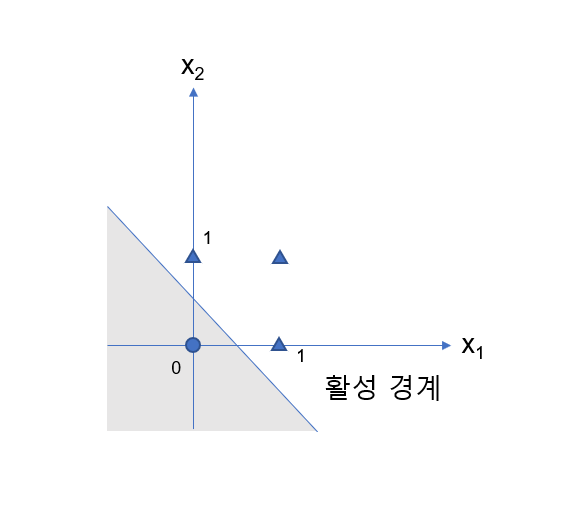

위를 보면, OR 게이트는 ($x_1$, $x_2$)
- (0, 0) 일 때 0을 출력(◯)
- (0, 1), (1, 0), (1, 1) 일 때 1을 출력 (△)
- 이렇게 ◯과 △을 직선으로 나눠야 한다.


그렇다면 XOR 게이트의 경우는 직선으로 나눌 수가 없다.
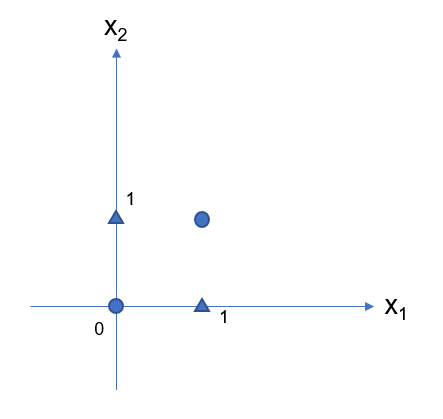

### 2.4.2 선형과 비선형
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. (아래와 같은 곡선은 표현할 수 없다는 것)
- 아래와 같은 곡선의 영역을 비선형 영역, 직선의 영역을 선형 영역이라 함.

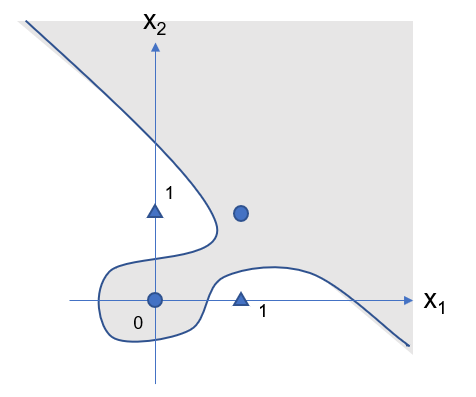

## 2.5 다층 퍼셉트론이 출동한다면

단층 퍼셉트론(single-layer-perceptron)으로는 XOR 게이트를 표현할 수 없다. (비선형 영역 분리가 불가능함)

하지만, **다층 퍼셉트론**(multi-layer-perceptron)으로 퍼셉트론에 층을 쌓아 표현할 수 있다.

### 2.5.1 기존 게이트 조합하기
- 이번에는 층을 하나 더 쌓아서 XOR을 표현해 보도록 한다.
- XOR 게이트를 만드는 방법 중 하나는 AND, NAND, OR 게이트를 조합하는 것.
  - 아래의 NAND 게이트 출력부의 ◯ 기호는 출력을 반전한다는 뜻
  - $x_1$, $x_2$가 입력 신호, $y$가 출력 신호를 뜻함
  - 3가지 게이트를 조합 ($x_1$과 $x_2$는 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어짐)

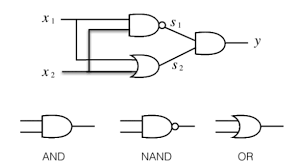

NAND의 출력을 $s_1$, OR의 출력을 $s_2$로 하여 진리표를 만들면 다음과 같다. 이는 XOR의 출력과 같다.

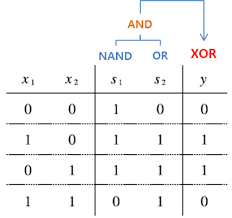

### 2.5.2 XOR 게이트 구현하기

In [11]:
# 조합된 XOR 게이트 구현

def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [12]:
XOR(0, 0) # 0을 출력
XOR(1, 0) # 1을 출력
XOR(0, 1) # 1을 출력
XOR(1, 1) # 0을 출력

0

아래는 XOR이라는 다층 구조의 네트워크이다. 지금까지의 AND, OR은 단층 퍼셉트론에 비해, XOR은 다층(2층) 퍼셉트론이다.

그림의 퍼셉트론은 모두 3층으로 구성되지만, 가중치를 갖는 층은 사실 2개(0층과 1층 사이, 1층과 2층 사이)뿐이니 '2층 퍼셉트론'이라 부르기로 한다.

동작을 자세히 서술하면 다음과 같다.
1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냄
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력

즉, XOR 게이트 퍼셉트론에서는 **신호를 전달**하는 일이 이뤄진다.

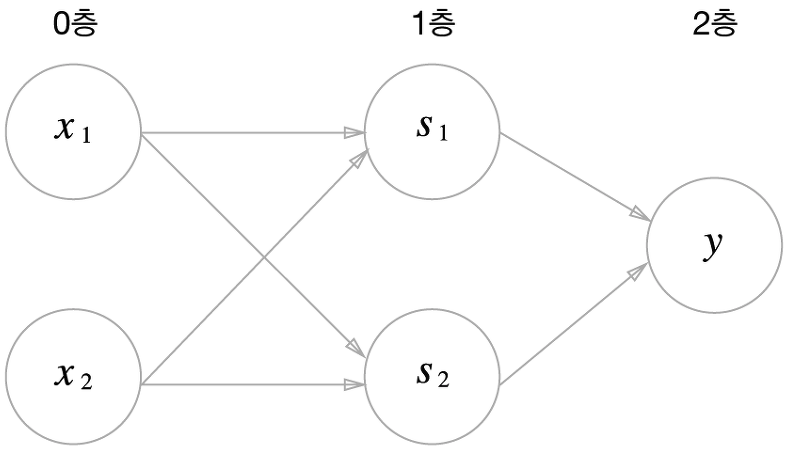

이처럼 2층 구조를 사용해 퍼셉트론으로 XOR 게이트를 구현할 수 있게 된다. 다시 말해 단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현할 수 있다.

=> 층을 쌓는 것, 즉 퍼셉트론을 깊게 하여 더 다양한 것을 표현할 수 있다.

## 2.7 정리


- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.